<a href="https://colab.research.google.com/github/tushant-akar/CS367-Artifical-Intelligence-Lab/blob/main/Error_Capability_of_Hopefield_Network_(Lab_6_Problem_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns

In [4]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
        self.theoretical_capacity = int(0.15 * size)

    def train(self, patterns):
        self.patterns = patterns
        n_patterns = len(patterns)
        self.weights = np.zeros((self.size, self.size))

        for pattern in patterns:
            pattern = pattern.reshape(-1, 1)
            self.weights += np.outer(pattern, pattern)

        np.fill_diagonal(self.weights, 0)
        self.weights /= self.size

    def recall(self, pattern, max_iterations=1000, threshold=0):
        pattern = pattern.copy()
        energy_history = []

        for i in range(max_iterations):
            energy_history.append(self.calculate_energy(pattern))
            pattern_old = pattern.copy()

            for j in np.random.permutation(self.size):
                activation = np.dot(self.weights[j], pattern)
                pattern[j] = 1 if activation > threshold else -1

            if np.array_equal(pattern, pattern_old):
                break

        return pattern, energy_history, i + 1

    def calculate_energy(self, pattern):
        return -0.5 * pattern.dot(self.weights).dot(pattern)

    def calculate_overlap(self, pattern1, pattern2):
        return np.sum(pattern1 * pattern2) / self.size

In [5]:
def create_complex_patterns():
    patterns = {
        'A': np.array([
            [0,0,1,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,1,0],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,1,1]
        ]),
        'B': np.array([
            [1,1,1,1,1,1,1,1,0,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,1,1,1,1,1,1,0,0],
            [1,1,1,1,1,1,1,1,0,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,0,0,0,0,0,1,1,0],
            [1,1,1,1,1,1,1,1,0,0]
        ]),
        'C': np.array([
            [0,0,1,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,1,0],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,1,1],
            [0,1,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,1,0,0]
        ])
    }

    return {k: (2*v - 1).flatten() for k, v in patterns.items()}

In [6]:
def add_noise(pattern, noise_level=0.2):
    noisy = pattern.copy()
    n_flip = int(len(pattern) * noise_level)
    flip_idx = np.random.choice(len(pattern), n_flip, replace=False)
    noisy[flip_idx] *= -1
    return noisy

In [7]:
def evaluate_error_correction(network, original_patterns, noise_levels):
    recovery_results = {}

    for noise_level in noise_levels:
        noisy_patterns = {}
        overlaps = {}

        for key, pattern in original_patterns.items():
            noisy_patterns[key] = add_noise(pattern, noise_level)
            recovered, _, _ = network.recall(noisy_patterns[key])
            overlaps[key] = network.calculate_overlap(pattern, recovered)

        recovery_results[noise_level] = overlaps

    return recovery_results

In [8]:
def plot_error_correction_performance(recovery_results, noise_levels):
    plt.figure(figsize=(10, 6))
    for key in next(iter(recovery_results.values())).keys():
        overlaps = [recovery_results[noise_level][key] for noise_level in noise_levels]
        plt.plot(noise_levels, overlaps, label=f'Pattern {key}')

    plt.title('Error Correction Performance')
    plt.xlabel('Noise Level')
    plt.ylabel('Overlap (Recovery Accuracy)')
    plt.legend()
    plt.grid(True)
    plt.show()

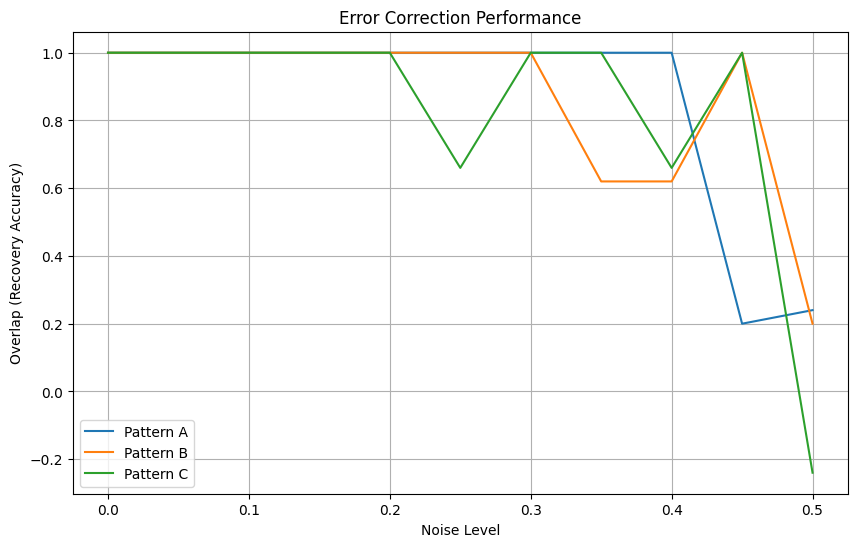

In [9]:
if __name__ == "__main__":
    size = 100
    network = HopfieldNetwork(size)

    patterns = create_complex_patterns()
    network.train(list(patterns.values()))

    noise_levels = np.linspace(0, 0.5, 11)
    recovery_results = evaluate_error_correction(network, patterns, noise_levels)

    plot_error_correction_performance(recovery_results, noise_levels)